In [1]:
import rbot

In [2]:
bb = rbot.DummyBb()
bb.restore()

In [3]:
df = rbot.rawlog_to_df(bb.raw_log(0, 0))

In [4]:
df

,action,price,size
timestamp,,,
2022-03-31 00:00:00+00:00,Sell,47047.5,12.0
2022-03-31 00:00:00+00:00,Sell,47047.5,2350.0
2022-03-31 00:00:00+00:00,Buy,47048.0,3378.0
2022-03-31 00:00:00+00:00,Buy,47048.0,10.0
2022-03-31 00:00:00+00:00,Buy,47048.0,12.0
...,...,...,...
2022-07-08 23:59:59+00:00,Sell,21569.0,3.0
2022-07-08 23:59:59+00:00,Sell,21569.0,3.0
2022-07-08 23:59:59+00:00,Sell,21569.0,90.0


In [65]:
import numpy as np
import pandas as pd

OFFSET_PERIOD = 1

# diff の方向はマイナスが正しい。
def log_return(series, periods=OFFSET_PERIOD):
    return  -np.log(series).diff(periods= - periods)

def calc_mean(x):
    if len(x['price'])== 0:
        return pd.NA

    return np.average(x['price'], weights=x['size'])    


# Closeのログリターンを計算する（Closeでいいのかな？）
def make_df(dummy_bb, asset_id):
    raw_df = rbot.rawlog_to_df(dummy_bb.raw_log(0, 0))

    df = raw_df['price'].resample('1T').ohlc()
    df['mean_price'] = raw_df.resample('1T').apply(calc_mean)
    df['Asset_ID'] = asset_id
    df = df.fillna(method='ffill')
    df['Target'] = log_return(df['mean_price'])

    del raw_df

    return df


In [66]:
df = make_df(bb, 0)


In [67]:
df

,open,high,low,close,mean_price,Asset_ID,Target
timestamp,,,,,,,
2022-03-31 00:00:00+00:00,47047.5,47064.5,46988.5,46997.5,47038.187929,0,-0.001152
2022-03-31 00:01:00+00:00,46997.5,47010.5,46979.0,46987.0,46984.011906,0,0.000918
2022-03-31 00:02:00+00:00,46987.0,47052.5,46987.0,47005.5,47027.143138,0,0.000187
2022-03-31 00:03:00+00:00,47006.0,47054.5,47005.5,47016.0,47035.946969,0,-0.000452
2022-03-31 00:04:00+00:00,47016.0,47026.5,47000.5,47003.0,47014.670965,0,-0.000461
...,...,...,...,...,...,...,...
2022-07-08 23:55:00+00:00,21765.0,21778.5,21763.5,21777.5,21771.909980,0,-0.001432
2022-07-08 23:56:00+00:00,21777.5,21777.5,21712.0,21713.5,21740.748054,0,-0.004098
2022-07-08 23:57:00+00:00,21713.5,21714.0,21608.0,21615.0,21651.833399,0,-0.003086


In [68]:
df['Target'].count()

143999

In [69]:
import matplotlib.pyplot as plt

def plot_hist(df):
    plt.plot(df['Target'])
    plt.show()

    plt.hist(df['Target'], bins=40)
    plt.show()

    plt.plot(df['close'])
    plt.show()

    print("")


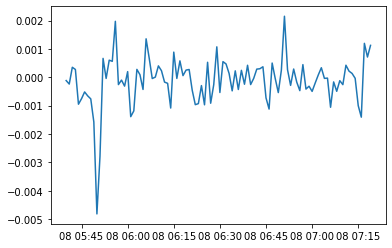

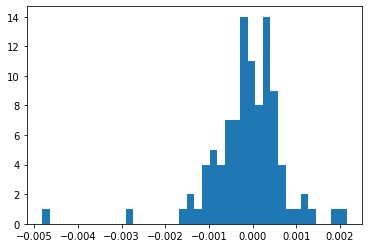

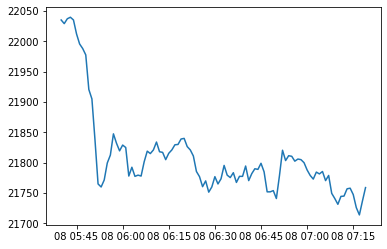

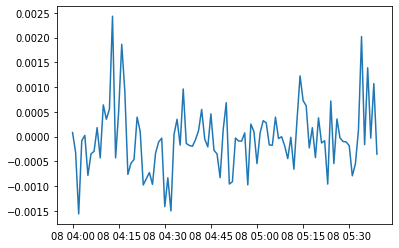

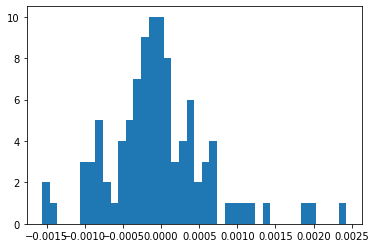

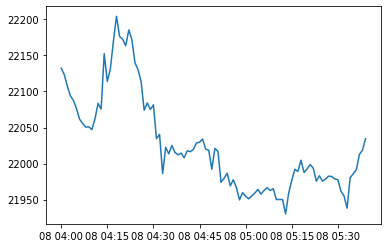

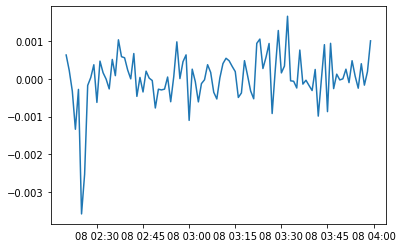

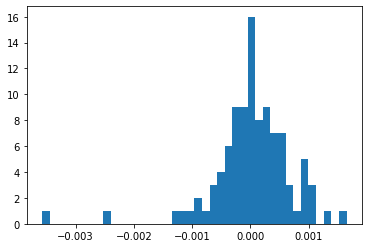

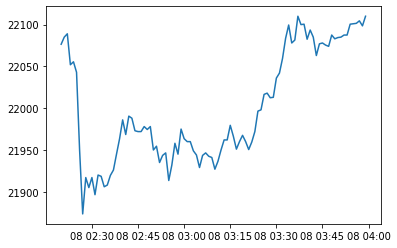

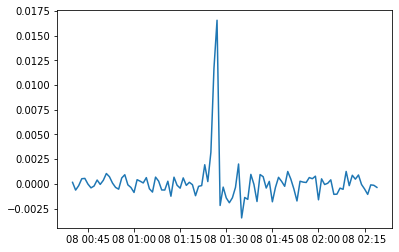

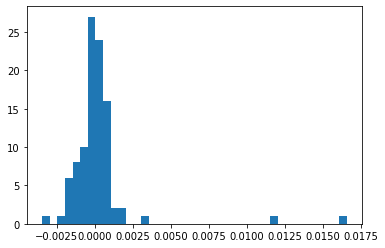

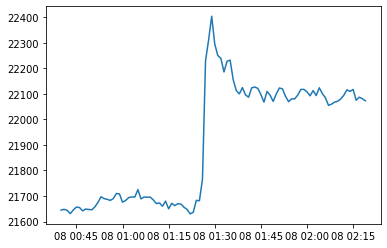

In [70]:



plot_hist(df[-1100:-1000])
plot_hist(df[-1200:-1100])
plot_hist(df[-1300:-1200])
plot_hist(df[-1400:-1300])


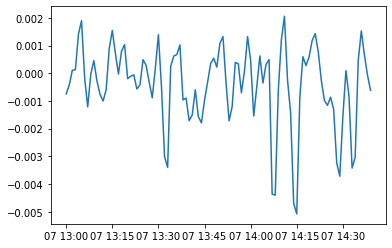

In [71]:
plt.plot(min_df['Target'])

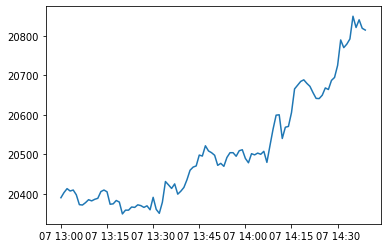

In [72]:
plt.plot(min_df['close'])